Problem Statement:
1. You have access to the salary information of several employees along with their Years of Experience. Using Linear regression analysis in machine learning, create a linear regression model can predict the salary of an employee based on the years of experience.

2. House prices can be an ever changing trend, but it does change based on certain parameters. You are provided with housing data that has information on various houses and their prices. Use the data at hand to predict the prices of the house using linear regression in machine learning.


Dataset Information:
1. Data.csv - This dataset contains two columns with 30 entries each for employee years
of experience and their salary.

Column Name

YearsExperience - The column contains 30 entries of the employee’s years of experience.
Salary - The salary column contains 30 entries of their respective salary for their years of experience.

2. Housing.csv - The dataset is considerably larger and contains the following columns in the data. The dataset contains more than 20,000 entries for information about the houses, prices and various other parameters.

id - The id column contains a separate id for the houses in the data.

date - The data contains the time series in which all the houses' respective dates have been mentioned.

price - The price column lists the price of the house.

bedrooms - The number of bedrooms in the house.

bathrooms - The number of bathrooms in the house.

sqft_living - The area of the living room.

sqft_lot - The area of the lot.

floors - Number of floors in the house.

waterfront - If the house has a waterfront or not

view - If the house has a viewfront or not.

condition - Condition of the house represented in various categories.

grade - The grade of the house in various categories.

sqft_above - The area above.

sqft_basement - The basement area.

yr_built - In which year the house was built.

yr_renovated - In which year the house was renovated.

zipcode - The zipcode of the house.

lat - The latitude information of the house.

long - The longitude information of the house.

sqft_lot15 - The average square footage of the 15 closest houses.

Sqft_basement_15 - The average square footage of the 15 closest houses.

Explore the datasets, and perform EDA on both the datasets before starting the following exercise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the data
data = pd.read_csv("data.csv")

# EDA - data exploration and preprocessing steps

In [5]:
# Check first few rows of the dataset
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


YearsExperience    0
Salary             0
dtype: int64


In [7]:
# Calculate summary statistics
summary_stats = data.describe()
print(summary_stats)

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


**1.How many employees having more than 5 years experience are earning more than 60000?**

In [9]:
# Filter employees with more than 5 years of experience and earning more than 60000
filtered_data = data[(data['YearsExperience'] > 5) & (data['Salary'] > 60000)]

# Get the count of such employees
result = filtered_data.shape[0]

print(result)

14


**2.How many employees are earning between 50000-80000?**

In [10]:
# Filter employees earning between 50000 and 80000
filtered_data = data[(data['Salary'] >= 50000) & (data['Salary'] <= 80000)]

# Get the count of such employees
result = filtered_data.shape[0]

print(result)

12


**3.The scatter plot in the following image shows the relationship between the “YearsExperience” and “Salary” columns. What possible inferences can be drawn from the plot?**

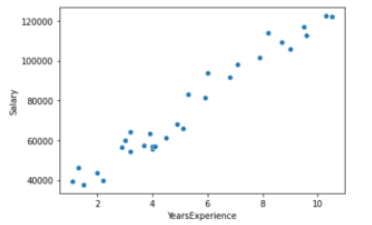

a. The plot shows a positive correlation between the ‘YearsExperience” and “Salary” column.

**4. The distribution plot of the column “YearsExperience” is shown in the image below, what possible inferences can be drawn from the plot.**

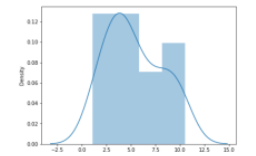

b. “YearsExperience” data is positively skewed.

**5. What all inferences can be drawn from the table shown below:**


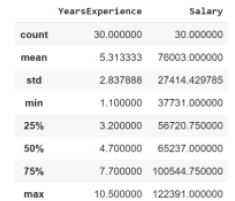

In [12]:
# Calculate the range for 'YearsExperience'
years_experience_range = data['YearsExperience'].max() - data['YearsExperience'].min()

# Calculate the range for 'Salary'
salary_range = data['Salary'].max() - data['Salary'].min()

print("Range of 'YearsExperience':", years_experience_range)
print("Range of 'Salary':", salary_range)

Range of 'YearsExperience': 9.4
Range of 'Salary': 84660.0


a. The range of the “YearsExperience” and “Salary” data is (9.4 , 84660 )



**6. To split the dataset into training and testing data, if we use the following code. X = data['YearsExperience']
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=0)      What does it mean when we write the test size as 0.2?**

d. The training data will consist of 80% of the samples from the total population.

**7. In the above example code, we have taken the random state as 0, if we change the random state as 42, what does it mean for our training and testing data?**

c. The random state does not have any effect on the shape of the data.

**8. If the r2 score calculated in the above example is 0.98 , change the sample size of the training and testing set in the ratio 60:40, and build a linear regression model again. After plotting the best fit line on the test data, calculate the r2_score for the new model.**

In [15]:
# Split the data into training (60%) and testing (40%) sets
X = data[['YearsExperience']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the r2_score for the new model
r2 = r2_score(y_test, y_pred)

print("R-squared (r2) score:", r2)

R-squared (r2) score: 0.9679117063698979


b. 0.96

**9. If while fitting the model with training and testing data, you get the following error ValueError: Expected 2D array, got 1D array instead: What could be the issue with the data, and how can you solve it?**

a. Reshape the data to a two-dimensional array

### **HOUSING**

**10. How many houses have a waterfront?**

In [17]:
# Load the 'Housing' dataset
housing_data = pd.read_csv('housing.csv')

# Count the number of houses with waterfront
num_waterfront_houses = housing_data[housing_data['waterfront'] == 1].shape[0]

print("Number of houses with waterfront:", num_waterfront_houses)


Number of houses with waterfront: 163


**11. How many houses have 2 floors?**

In [18]:
# Count the number of houses with 2 floors
num_houses_with_2_floors = housing_data[housing_data['floors'] == 2].shape[0]

print("Number of houses with 2 floors:", num_houses_with_2_floors)

Number of houses with 2 floors: 8241


**12. How many houses built before 1960 have a waterfront?**

In [19]:
# Filter houses built before 1960
houses_built_before_1960 = housing_data[housing_data['yr_built'] < 1960]

# Count the number of houses with a waterfront among those built before 1960
num_waterfront_houses_built_before_1960 = houses_built_before_1960[houses_built_before_1960['waterfront'] == 1].shape[0]

print("Number of houses built before 1960 with a waterfront:", num_waterfront_houses_built_before_1960)

Number of houses built before 1960 with a waterfront: 80


**13. What is the price of the most expensive house having more than 4 bathrooms?**

In [21]:
# Filter houses with more than 4 bathrooms
houses_with_more_than_4_bathrooms = housing_data[housing_data['bathrooms'] > 4]

# Find the price of the most expensive house among these
most_expensive_house_price = houses_with_more_than_4_bathrooms['price'].max()

print("Price of the most expensive house with more than 4 bathrooms:", most_expensive_house_price)

Price of the most expensive house with more than 4 bathrooms: 7700000


**14. The image shown below shows the boxplot of the price column from the housing dataset. What inferences can you make from the plot?**

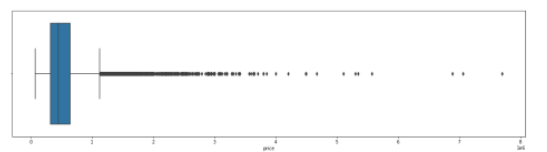

c. There is a presence of outliers in the price data.

**15. For instance, if the ‘price’ column consists of outliers, how can you make the data clean and remove the redundancies?**

a. Calculate the IQR range and drop the values outside the range.

**16. What are the various parameters that can be used to determine the dependent variables in the housing data to determine the price of the house?**

a. Correlation coefficients

**17. If we get the r2 score as 0.38, what inferences can we make about the model and its efficiency?**

c. Low difference between observed and fitted values.

**18. If the metrics show that the p-value for the grade column is 0.092, what all inferences can we make about the grade column?**

c. insignificance in presence of other variables

**19. If the Variance Inflation Factor value for a feature is considerably higher than the other features, what can we say about that column/feature?**

a. High multicollinearity